In [32]:
import pandas as pd

# Read the dataset
data = pd.read_csv('/content/dataset.csv')  # Replace '/path/to/dataset.csv' with the path to your dataset file

# Get the size of the dataset
dataset_size = data.shape

# Print the size of the dataset
print("Dataset size:", dataset_size)


Dataset size: (2923, 2)


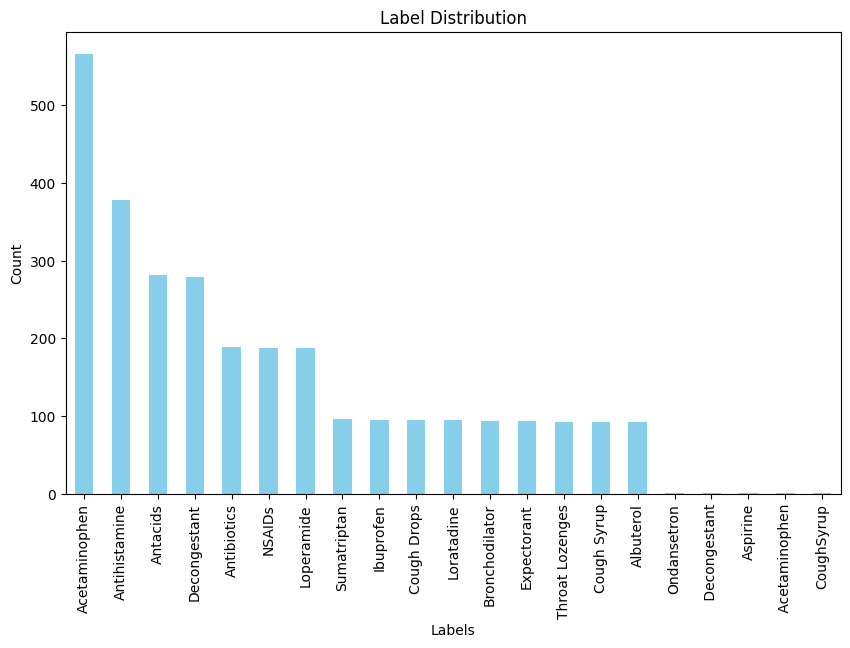

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Read data from CSV
csv_file = r'/content/dataset.csv'
data = pd.read_csv(csv_file)

# Visualize label distribution
plt.figure(figsize=(10, 6))
data['Labels'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Label Distribution')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.show()


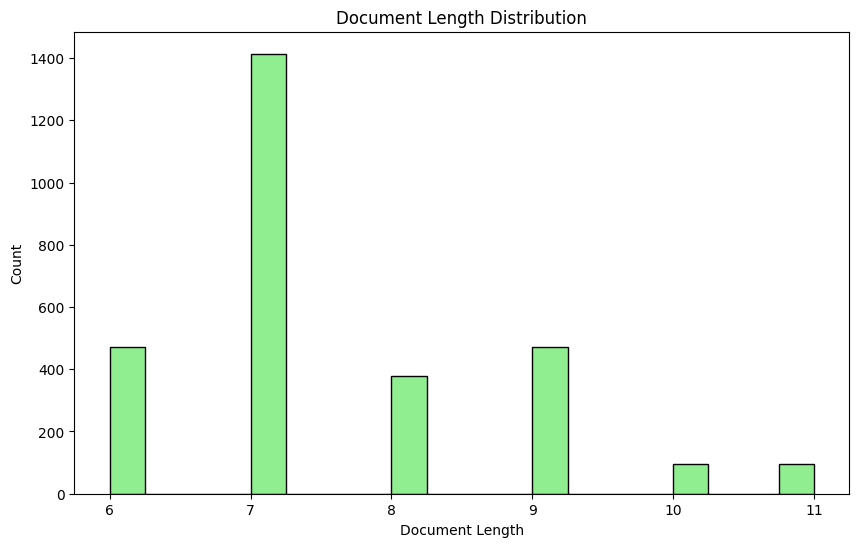

In [3]:
# Filter out NaN values
data = data.dropna(subset=['Document'])

# Calculate document lengths
document_lengths = data['Document'].apply(lambda x: len(str(x).split()))

# Visualization code remains the same
plt.figure(figsize=(10, 6))
plt.hist(document_lengths, bins=20, color='lightgreen', edgecolor='black')
plt.title('Document Length Distribution')
plt.xlabel('Document Length')
plt.ylabel('Count')
plt.show()


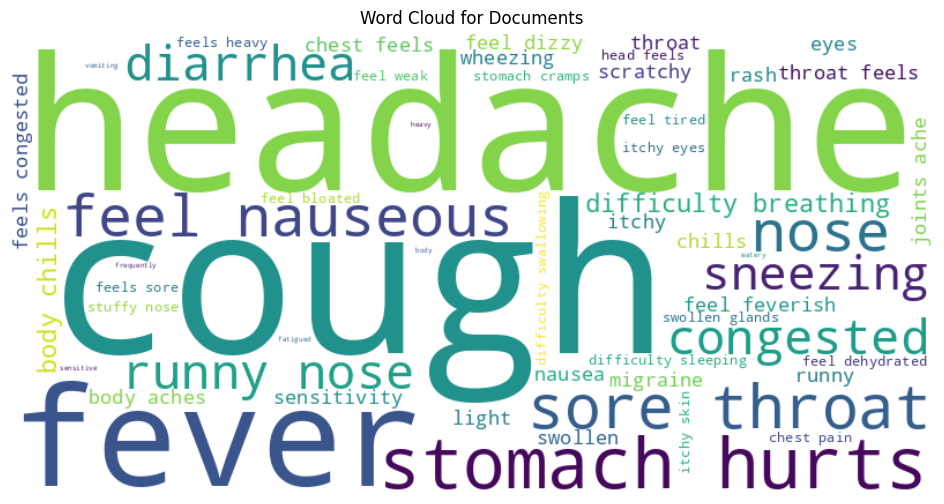

In [4]:
from wordcloud import WordCloud

# Generate word cloud for all documents
all_text = ' '.join(data['Document'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Documents')
plt.axis('off')
plt.show()


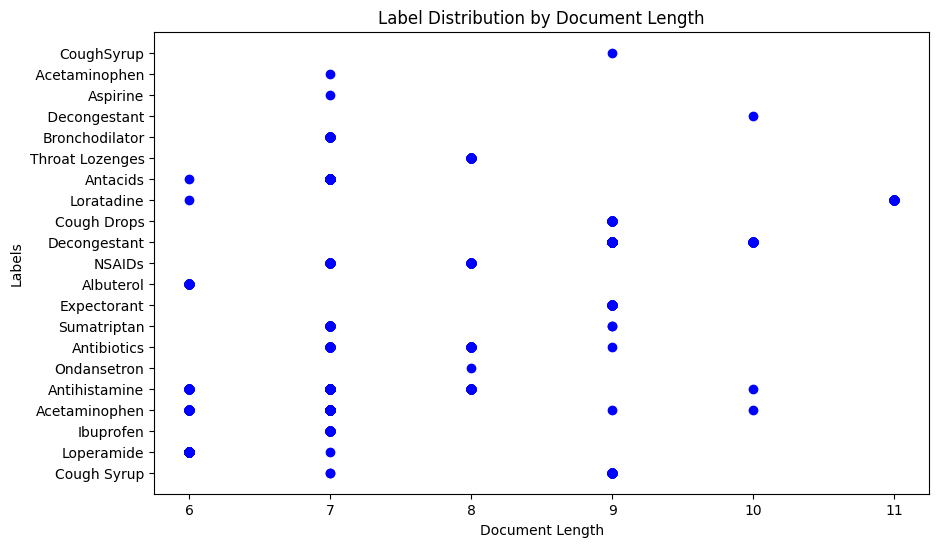

In [5]:
plt.figure(figsize=(10, 6))
plt.scatter(document_lengths, data['Labels'], color='blue')
plt.title('Label Distribution by Document Length')
plt.xlabel('Document Length')
plt.ylabel('Labels')
plt.show()


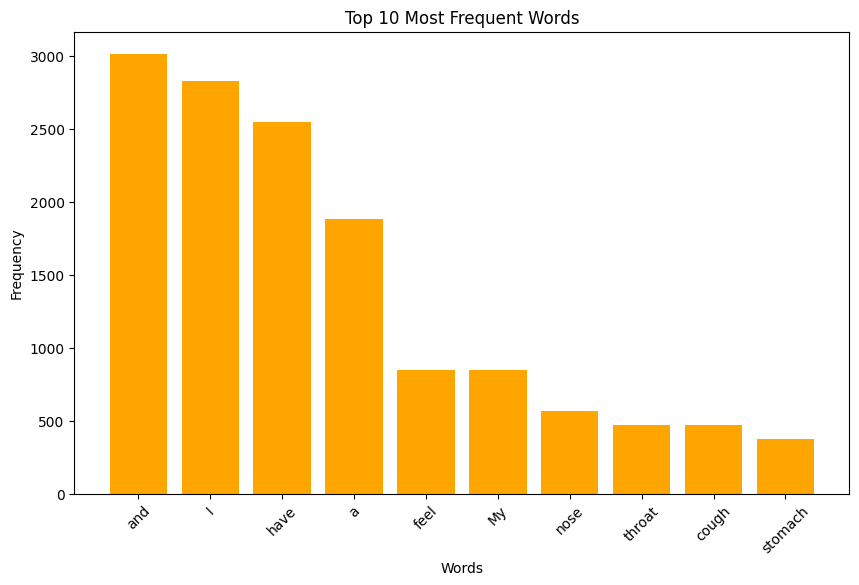

In [6]:
from collections import Counter

# Tokenize and count words
all_words = ' '.join(data['Document']).split()
word_counts = Counter(all_words)

# Plot top N most frequent words
top_n = 10
top_words = dict(word_counts.most_common(top_n))
plt.figure(figsize=(10, 6))
plt.bar(top_words.keys(), top_words.values(), color='orange')
plt.title(f'Top {top_n} Most Frequent Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


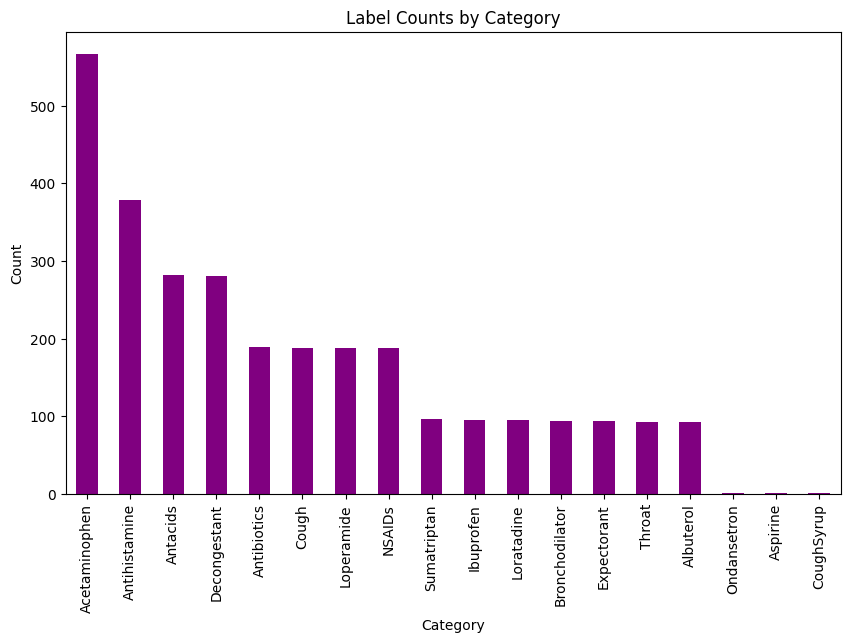

In [7]:
plt.figure(figsize=(10, 6))
data['Category'] = data['Labels'].apply(lambda x: x.split()[0])  # Extract first word as category
data['Category'].value_counts().plot(kind='bar', color='purple')
plt.title('Label Counts by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()


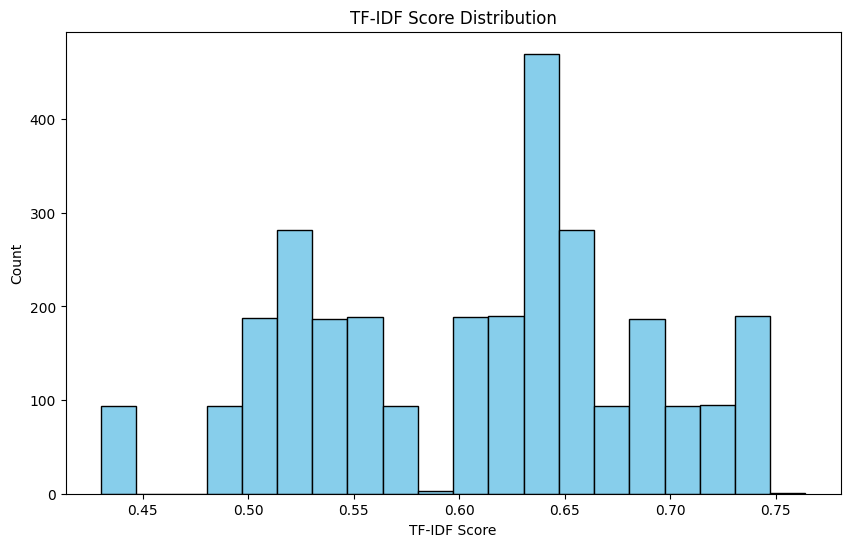

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Calculate TF-IDF scores
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(data['Document'])
tfidf_scores = tfidf_matrix.max(axis=1).toarray().flatten()  # Max TF-IDF score per document

plt.figure(figsize=(10, 6))
plt.hist(tfidf_scores, bins=20, color='skyblue', edgecolor='black')
plt.title('TF-IDF Score Distribution')
plt.xlabel('TF-IDF Score')
plt.ylabel('Count')
plt.show()


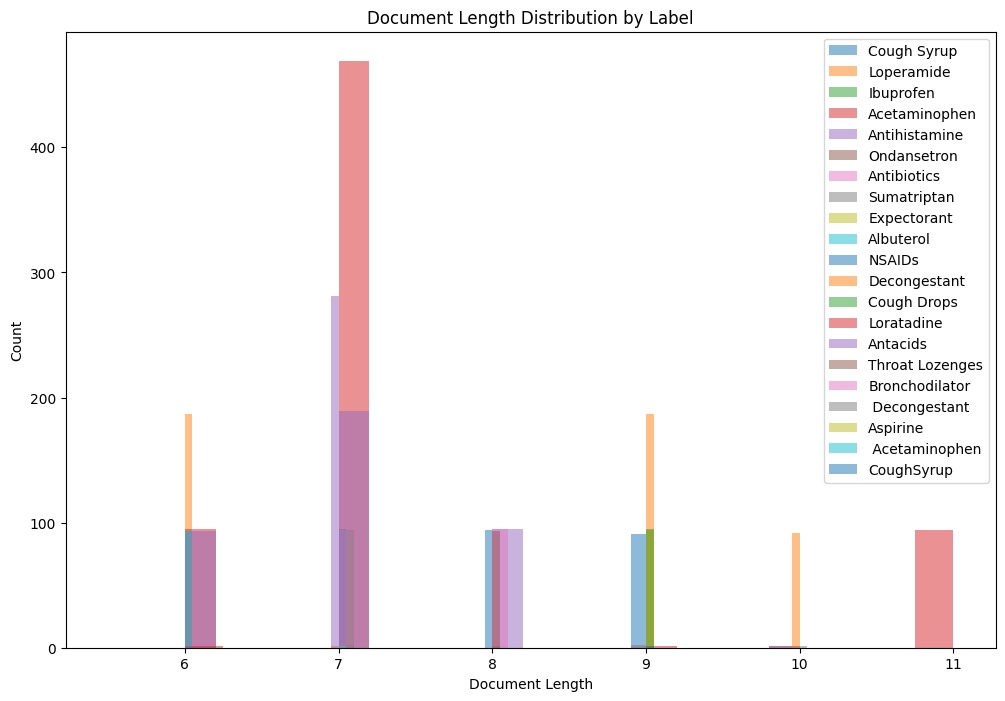

In [ ]:
plt.figure(figsize=(12, 8))
for label in data['Labels'].unique():
    label_data = data[data['Labels'] == label]
    document_lengths = label_data['Document'].apply(lambda x: len(str(x).split()))
    plt.hist(document_lengths, bins=20, alpha=0.5, label=label)
plt.title('Document Length Distribution by Label')
plt.xlabel('Document Length')
plt.ylabel('Count')
plt.legend()
plt.show()


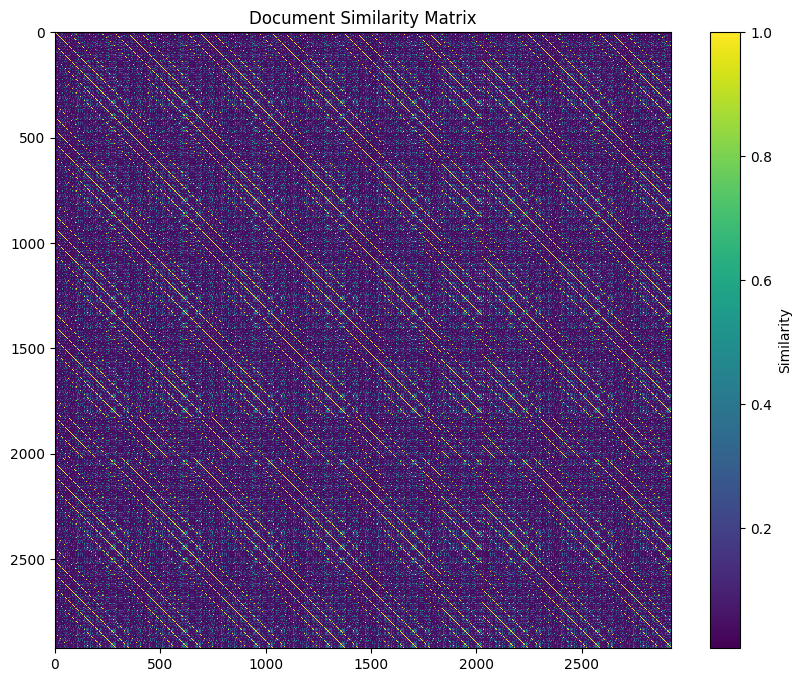

In [9]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate cosine similarity matrix
similarity_matrix = cosine_similarity(tfidf_matrix)

plt.figure(figsize=(10, 8))
plt.imshow(similarity_matrix, cmap='viridis', interpolation='nearest')
plt.title('Document Similarity Matrix')
plt.colorbar(label='Similarity')
plt.show()


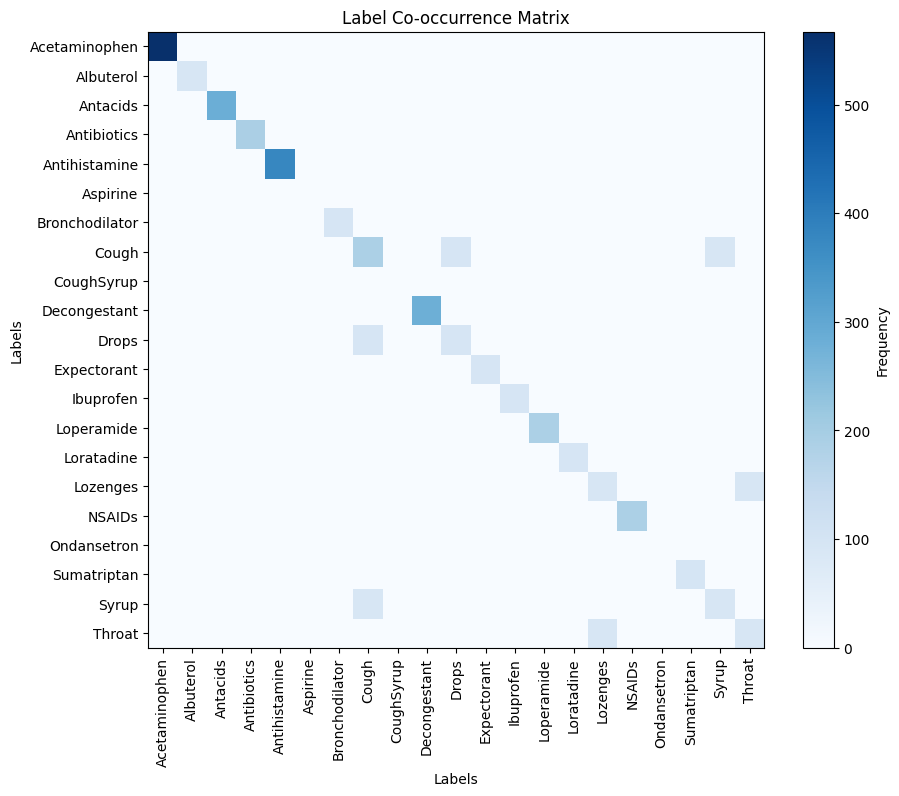

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Convert to DataFrame
data_df = pd.DataFrame(data)

# Extract unique label names
label_names = sorted(set(' '.join(data_df['Labels']).split()))

# Create an empty co-occurrence matrix
cooccurrence_matrix = pd.DataFrame(np.zeros((len(label_names), len(label_names))), index=label_names, columns=label_names)

# Fill the co-occurrence matrix
for labels in data_df['Labels']:
    labels_list = labels.split()
    for i in labels_list:
        for j in labels_list:
            cooccurrence_matrix.loc[i, j] += 1

plt.figure(figsize=(10, 8))
plt.imshow(cooccurrence_matrix, cmap='Blues', interpolation='nearest')
plt.title('Label Co-occurrence Matrix')
plt.xlabel('Labels')
plt.ylabel('Labels')
plt.colorbar(label='Frequency')
plt.xticks(range(len(cooccurrence_matrix.columns)), cooccurrence_matrix.columns, rotation=90)
plt.yticks(range(len(cooccurrence_matrix.index)), cooccurrence_matrix.index)
plt.show()


Data PreProcessing


In [29]:
import pandas as pd
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Read data from CSV
data_df = pd.read_csv('/content/dataset.csv')  # Replace 'your_dataset.csv' with your CSV filename

# Function for text cleaning and normalization
def clean_text(text):
    # Remove special characters and punctuation
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert text to lowercase
    text = text.lower()
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Join tokens back into text
    cleaned_text = ' '.join(tokens)
    return cleaned_text

# Apply text cleaning function to the 'Document' column
data_df['Cleaned_Document'] = data_df['Document'].apply(clean_text)

# Encode labels
label_encoder = LabelEncoder()
data_df['Encoded_Labels'] = label_encoder.fit_transform(data_df['Labels'])

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(data_df['Cleaned_Document'])


# Show the preprocessed DataFrame
print("Preprocessed DataFrame:")
print(data_df)


Preprocessed DataFrame:
                                               Document         Labels  \
0                        I have a sore throat and cough    Cough Syrup   
1                  My stomach hurts and I have diarrhea     Loperamide   
2                      I have a headache and feel dizzy      Ibuprofen   
3                 I feel feverish and have body aches    Acetaminophen   
4     My eyes are watery and I have a runny nose    ...  Antihistamine   
...                                                 ...            ...   
2918  My stomach hurts and I feel nauseous          ...       Antacids   
2919  I have a migraine and feel nauseous           ...    Sumatriptan   
2920  My nose is congested and I have a headache    ...   Decongestant   
2921  I have a fever and body chills                ...  Acetaminophen   
2922  I have a rash and itchy skin                  ...  Antihistamine   

                Cleaned_Document  Encoded_Labels  
0              sore throat cough    

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer





# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# SVM model training with hyperparameter tuning
svm_classifier = SVC()
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly']}
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best parameters found by GridSearchCV
print("Best parameters:", grid_search.best_params_)

# Evaluate the model
train_accuracy = grid_search.score(X_train, y_train)
test_accuracy = grid_search.score(X_test, y_test)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Save the trained model
model_file = 'svm_model.pkl'
joblib.dump(grid_search.best_estimator_, model_file)
print("Model saved successfully.")

# Save the vectorizer
vectorizer_file = 'vectorizer.pkl'
joblib.dump(tfidf_vectorizer, vectorizer_file)
print("Vectorizer saved successfully.")


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best parameters: {'C': 0.1, 'kernel': 'linear'}
Training Accuracy: 0.9935842600513259
Testing Accuracy: 0.9948717948717949
Model saved successfully.
Vectorizer saved successfully.
